# OpenIntro Statistics Notes
https://www.amazon.com/OpenIntro-Statistics-Third-David-Diez/dp/194345003X

In [63]:
%%html
<style>
table {float:left}
</style>

In [62]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Frequently used characters

| symbol | definition |
|--------|------------|
| μ | population mean |
| σ<sup>2</sup> | population variance |
| σ | standard deviation |
| x̅ | sample mean |
| s<sup>2</sup> | sample variance |
| s | sample standard deviation |

## Chapter 1 - Introduction

### Definitions
**Confounding Variable**: a variable which is correlated with both explanatory and response variables. e.g., `gender`[1] in a test to determine if a `drug`[2] leads to `recovery`[3].

1: confounding variable    
2: explanatory variable    
3: response variable    

#### Sampling Methods

**Simple random sampling**: Lottery-style random sampling.    
**Stratified random sampling**: Population is divided into groups/strata based on similar characteristics, then randomly sampled from each strata.    
**Clustered random sampling**: Population is divided into many groups/clusters, then we choose a fixed number of clusters and use all samples from those selected clusters.    
**Multistage random sampling**: Like clustered random sampling, but choose samples at random from clusters instead of using all samples from selected clusters.

**Point Estimate**: A sample value used to estimate that respective value for the entire population. e.g., the sample mean is a point estimate of the population mean.

**Standard Deviation**: A description of how far away a typical observation is from the mean. Useful when considering how close the data are to the mean.
**Variance**: The squared value of the standard deviation. The averaged square distance from the mean.

### Notes

* The median and IQR are called **robust estimates** because outliers have little effect on their values. The mean and standard deviation are much more affected by outliers.

## Chapter 2 - Probability

### Definitions

**Probability**: The proportion of times the outcome would occur if we observed the random process an infinite number of times.    
**Law of Large Numbers**: As more observations are collected, the proportion of occurences with a particular outcome converges to the probability of that outcome.    
**Probability Distribution**: A table of all disjoint outcomes and their associated probabilities:    

| Dice Sum | Probability |
|----------|-------------|
| 2 | 1/36 |
| 3 | 2/36 |
| 4 | 3/36 |
| 5 | 4/36 |
| 6 | 5/36 |
| 7 | 6/36 |
| 8 | 5/36 |
| 9 | 4/36 |
| 10 | 3/36 |
| 11 | 2/36 |
| 12 | 1/36 |

**Sample Space**: The set of all possible outcomes of an event

### Notes

* The probability that one of `k` multiple disjoint/mutually exclusive events `Ak` occur is `P(A1)+P(A2)+...+P(Ak)`
  - e.g., Probability of rolling a 1 or 2 on a die => `P(1 or 2) = P(1) + P(2) = 1/6 + 1/6 = 1/3`

* If `A` and `B` are any two events, disjoint or not, then the probability that at least one of them will occur is:    
`P(A or B) = P(A) + P(B) - P(A and B)`

* The **Complement** of a sample space `D` is the set of all outcomes not in `D`. Denoted `D`<sup>`c`</sup>    

* If `A` and `B` represent events from independent processes, then the probability that both events will occur is: `P(A and B) = P(A) x P(B)`

* A probability based on a single variable is called a **Marginal Probability**. e.g., `P(teen went to college)`

* A probability based on more than one variables is called a **Joint Probability**. e.g, `P(teen went to college and parent not)`

#### Conditional Probability
* The conditional probability of the outcome of interest A given condition B is:    
$$ P(A|B) = \frac{P(A and B)}{P(B)} $$

#### Random Variables
* A variable or process with a numerical outcome. Usually denoted by a capital letter (X, Y, Z). e.g., the amount a single student will spend on textbooks.

* The **Expected Outcome** E(X) or μ of a random variable is the sum of all outputs multiplied by their probabilities:
$$ E(X) = μ = \sum_{i=1}^k x_i P(X=x_i) $$

#### Continuous Distributions
* A **Probability Density Function** is a curve that represents where outcomes of events are likely to occur. In other words, it's a fine-grain histogram of probabilities. The area under a PDF is equal to 1.

## Chapter 3 - Distributions of random variables

### Definitions

### Notes

#### Normal Distribution
* Symmetric, unimodal, bell-shaped curve

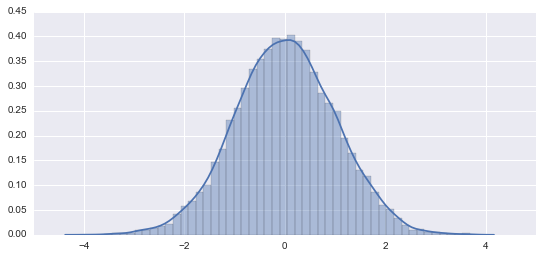

In [35]:
# Normal Distribution
sns.set(rc={"figure.figsize": (9, 4)})
mu, sigma = 0, 1
x = np.random.normal(mu, sigma, 10000)
sns.distplot(x)

#### Z-scores
* The **Z-score** of an observation is the number of standard deviations it lies from the mean. e.g., if a data point / observation is 1 standard deviation above the mean, its z-score is +1.
$$ Z = \frac{x - μ}{σ} $$

#### Geometric Distribution
* When an individual trial only has two possible outcomes, it is called a **Bernoulli random variable**. i.e., `success` or `failure`.
* If you label a `success` as `p` and a `failure` as `q`, then X is a Bernoulli random variable with mean $ μ = p $ and standard deviation $ σ = \sqrt{p(1-p)} $.    
* **Geometric Distribution**:
  * A distribution that describes the waiting time until a `success` for **independent and identically distributed (iid)** Bernoulli random variables. i.e., `P(nth trial is success) = P(all n-1th trials are failures)`.
  * The probability of finding the first `success` in the `nth` trial is given by: $ (1-p)^{n-1}p $
  * $ μ = \frac{1}{p} $
  * $ σ^2 = \frac{1-p}{p^2} $
  * $ σ = \sqrt{\frac{1-p}{p^2}} $

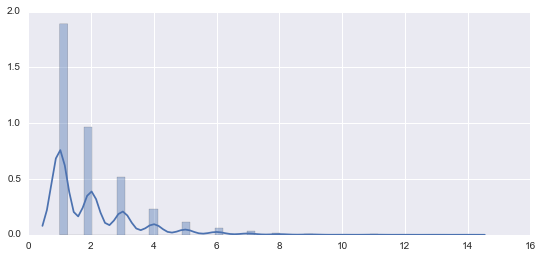

In [47]:
# Geometric Distribution
x = np.random.geometric(p=0.5, size=5000)
sns.distplot(x)

#### Binomial Distribution
* If the probability of a single `success` trial is `p`, then the probability of observing `k` successes in `n` independent trials is $ { n \choose k}p^k(1-p)^{n-k} = \frac{n!}{k!(n-k)!}p^k(1-p)^{n-k} $
* $ μ = np $
* $ σ^2 = np(1-p) $
* $ σ = \sqrt{np(1-p)} $

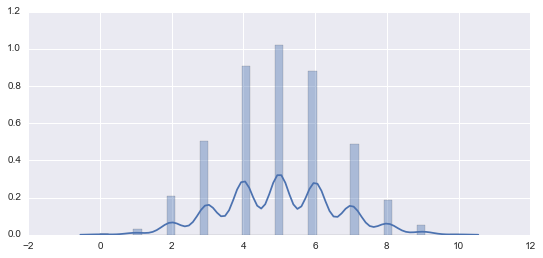

In [52]:
# Binomial Distribution
x = np.random.binomial(n=10, p=0.5, size=5000)
sns.distplot(x)

#### Poisson Distribution
* Useful for estimating the number of events in a large population over a unit of time.
* The **rate** `λ` for a Poisson Distribution is the average number of occurences in a mostly fixed population per unit of time.
* `P(observe k events) =` $ \frac{λ^ke^{-λ}}{k!} $ where `k ∈ Z`
* $ μ = λ $
* $ σ^2 = λ $
* $ σ = \sqrt{λ} $

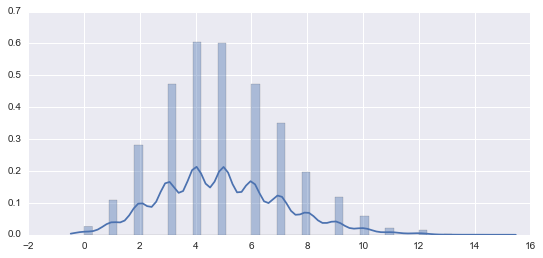

In [54]:
# Poisson Distribution
x = np.random.poisson(5, size=10000)
sns.distplot(x)

## Chapter 4 - Foundations for inference

### Notes

* Statistical inference is concerned primarily with understanding the quality of parameter estimates. e.g., how certain are we that the estimated mean x̅ is near the population mean μ?

#### Sampling Distribution
* Take a sample of size `n` from a population `m` times and create a distribution of means. e.g., assume a large population; take a sample of 100 students and find their mean height; do this 1000 times and create a histogram/distribution chart.
* The standard deviation of this distribution describes the typical error of the point estimate means, and we call this standard deviation the **standard error (SE)** of the estimate.
* You can find the standard error from just a single point estimate, however, with $ SE_\overline{x} = σ_\overline{x} = \frac{σ}{\sqrt{n}} \approx \frac{s}{\sqrt{n}} $

#### Confidence Intervals
* Point estimates are cool, but they usually have an error to them. We can get a better idea of an estimate by finding a _range of values_ instead of just a point.
* A plausible range of values for the population parameter is called a **confidence interval**.
* "The standard error represents the standard deviation associated with the estimate, and roughly 95% of the time the estimate will be within 2 standard errors of the population parameter. If the interval spreads out 2 standard errors from the point estimate, we can be roughly 95% **confident** that we have captured the true parameter: `point estimate ± 2 * SE`"
* Correct interpretation of a CI: "We are XX% sure that the population parameter is between ..."
* Incorrect interpretation of a CI: "We have found the population parameter with a certain probability XX%"

#### Hypothesis Testing
* **Null Hypothesis $ (H_0) $**: Often represents a skeptical position or a perspective of no difference.
* **Alternative Hypothesis $ (H_A) $ **: Often represents a new perspective, such as the possibility that there has been a change.
* tl;dr the skeptic will not reject the null hypothesis unless the evidence in favor of the alternative hypothesis is very strong
* Even if we fail to reject the null hypothesis, we typically do not accept the null hypothesis as true.
* We call the value of the null hypothesis the **null value**.
